In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('creditcard.csv')

In [30]:
# converting time to the time of the day in hours will be more efficient in visualization i do not need the seconds exactly
df['Time_in_hours'] = (df['Time'] // 3600) % 24

# from here we can notice that the data is imbalanced and have no Null Values 

In [31]:
# Check for missing values
df.isnull().sum()

# Check the distribution of the target variable
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

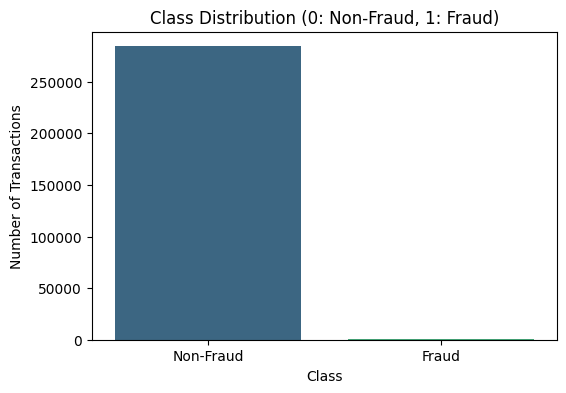

In [32]:
class_distribution = df['Class'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')

# Add title and labels
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

In [33]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_in_hours
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,14.046470
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,5.835854
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000


# Splitting the Data based on the classes

In [34]:
fraud =df[df.Class==1]
normal =df[df.Class==0]

print(f"Fraud : {fraud.shape}")
print(f"Normal : {normal.shape}")

Fraud : (492, 32)
Normal : (284315, 32)


# Let's now have a look of the time of fraud vs the time of normal transactions

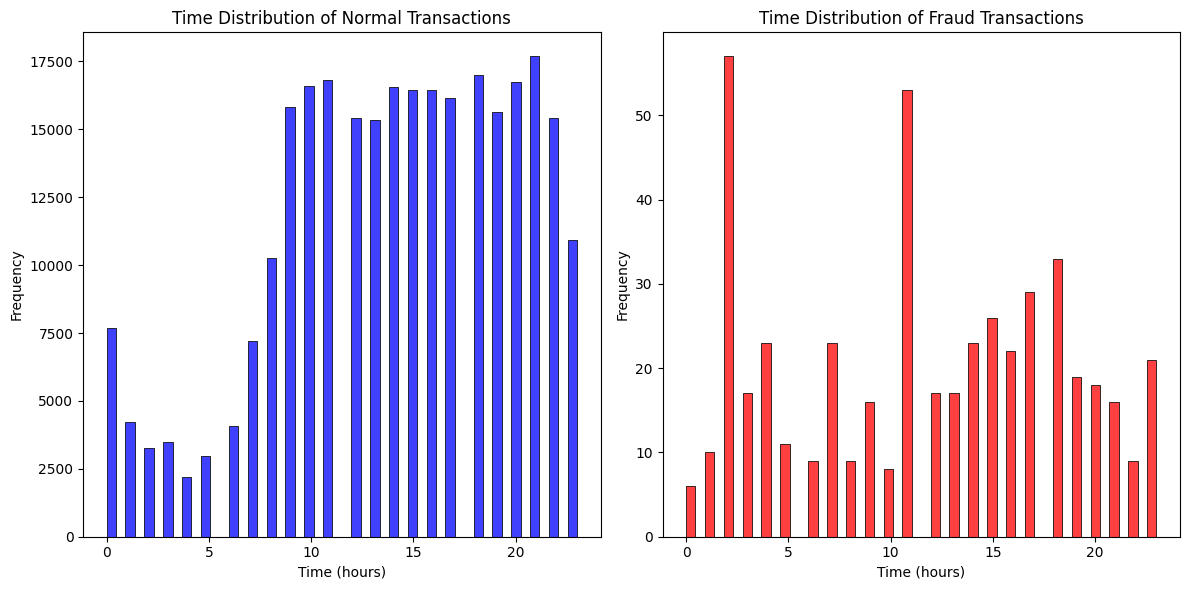

In [35]:
# Plot the time distribution for fraud and normal transactions
plt.figure(figsize=(12, 6))

# Plot for normal transactions
plt.subplot(1, 2, 1)
sns.histplot(normal['Time_in_hours'], bins=50, kde=False, color='blue')
plt.title('Time Distribution of Normal Transactions')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')

# Plot for fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(fraud['Time_in_hours'], bins=50, kde=False, color='red')
plt.title('Time Distribution of Fraud Transactions')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

we can see that the time distribution is so different between the fraud and non-fraud most likely the fraud will be done early in the day but the non-fraud has a very reasonable distribution without outliers.

# Let's See if the correlation matrices of the fraud and non-fraud can lead to anythin

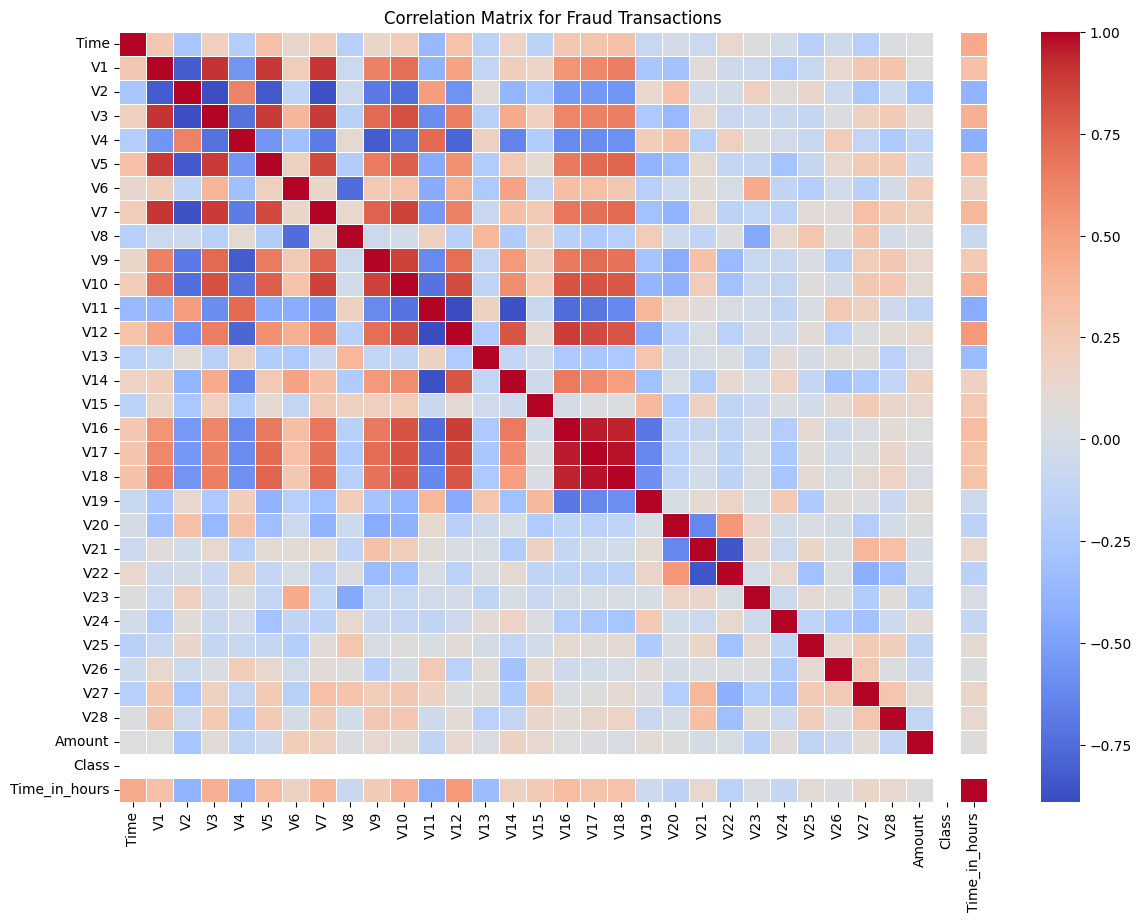

Time            NaN
V1              NaN
V2              NaN
V3              NaN
V4              NaN
V5              NaN
V6              NaN
V7              NaN
V8              NaN
V9              NaN
V10             NaN
V11             NaN
V12             NaN
V13             NaN
V14             NaN
V15             NaN
V16             NaN
V17             NaN
V18             NaN
V19             NaN
V20             NaN
V21             NaN
V22             NaN
V23             NaN
V24             NaN
V25             NaN
V26             NaN
V27             NaN
V28             NaN
Amount          NaN
Class           NaN
Time_in_hours   NaN
Name: Class, dtype: float64


In [37]:
# Compute the correlation matrix for fraud transactions
fraud_corr_matrix = fraud.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(fraud_corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Fraud Transactions')
plt.show()

# Display the correlations with the target variable for fraud transactions
fraud_corr_with_target = fraud_corr_matrix['Class'].sort_values(ascending=False)
print(fraud_corr_with_target)

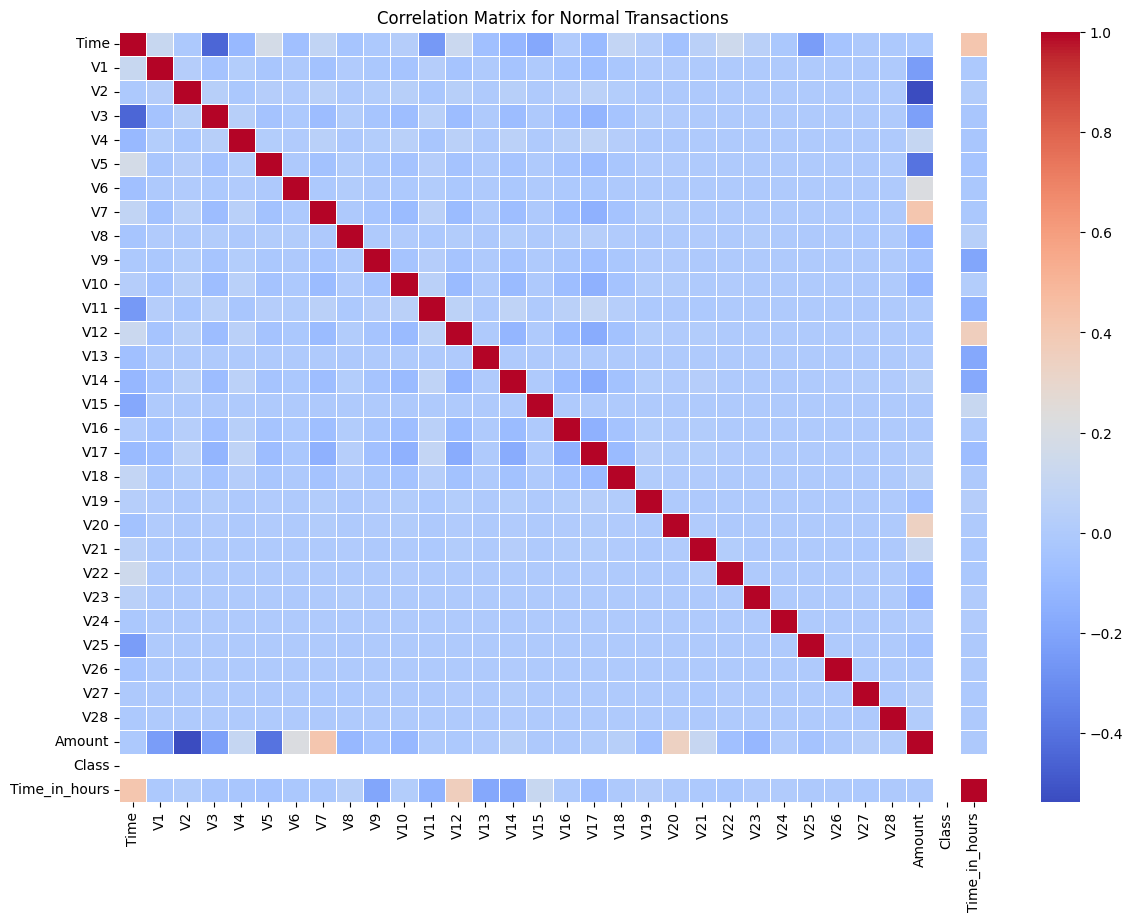

Time            NaN
V1              NaN
V2              NaN
V3              NaN
V4              NaN
V5              NaN
V6              NaN
V7              NaN
V8              NaN
V9              NaN
V10             NaN
V11             NaN
V12             NaN
V13             NaN
V14             NaN
V15             NaN
V16             NaN
V17             NaN
V18             NaN
V19             NaN
V20             NaN
V21             NaN
V22             NaN
V23             NaN
V24             NaN
V25             NaN
V26             NaN
V27             NaN
V28             NaN
Amount          NaN
Class           NaN
Time_in_hours   NaN
Name: Class, dtype: float64


In [38]:
# Compute the correlation matrix for normal transactions
normal_corr_matrix = normal.corr()

# Plot the heatmap for normal transactions
plt.figure(figsize=(14, 10))
sns.heatmap(normal_corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Normal Transactions')
plt.show()

# Display the correlations with the target variable for normal transactions
normal_corr_with_target = normal_corr_matrix['Class'].sort_values(ascending=False)
print(normal_corr_with_target)

There is a whole much difference between the correlation of fraud and non-fraud the fraud correlation matrix has much stronger patterns to detect between the features which can eanble us to recognize these patterns in the future

# Here is a box plot that shows the amout of the fraud and non-fraud

Text(0.5, 1.0, 'Normal')

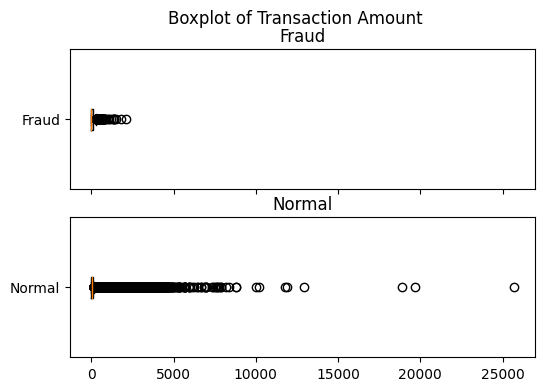

In [40]:
# Boxplot of normal and fraudulent transactions

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
fig.suptitle('Boxplot of Transaction Amount')

ax1.boxplot(fraud.Amount, vert=False, labels=['Fraud'])
ax1.set_title('Fraud')

ax2.boxplot(normal.Amount, vert=False, labels=['Normal'])
ax2.set_title('Normal')

In any transaction data there must be outliers cause we do not all rich to buy expensive things but there are some of us rich and the rest is normal so it is absolutely noraml to have outliers like the box plot of non-fraud transactions. but the fact that fraud transactions does not have any ouliers is very weird and shows that tis is another pattern. and the plot also shows that the amounts of the fraud are significantly less than non-fraud and this is an expected pattern of them.